In [3]:
%%time
# importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,auc,f1_score,recall_score,roc_curve,accuracy_score
from sklearn.metrics import precision_score,confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import KMeansSMOTE
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm



warnings.filterwarnings('ignore')

CPU times: user 169 µs, sys: 9 µs, total: 178 µs
Wall time: 187 µs


In [4]:
%%time
#loading the dataset

train_data=pd.read_csv("train.csv")    


CPU times: user 6.7 s, sys: 386 ms, total: 7.09 s
Wall time: 8.45 s


In [5]:

train_data.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
# Details about the data
print("The Number of Records have in the Dataset :",train_data.shape[0])
print("The Number of Features have in the Dataset :",train_data.shape[1]-2)

The Number of Records have in the Dataset : 200000
The Number of Features have in the Dataset : 200


### 1.Data Analysis

#### 1.1 Univariate analysis : Target variable 

Text(0.5, 1.0, 'CLASS-0 vs CLASS-1')

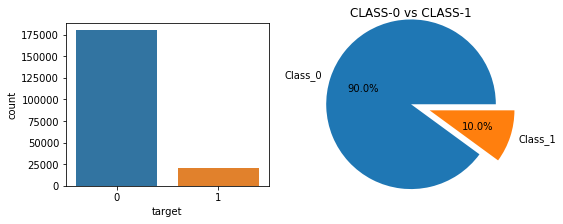

In [7]:
%matplotlib inline
#finding the target value to conclude the values 
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sbn.countplot(train_data.target)
plt.subplot(1,2,2)
plt.pie(train_data.target.value_counts(),explode=[0,0.3],radius=1.3,labels=["Class_0","Class_1"],autopct=lambda x:str(round(x))+"%")
plt.title("CLASS-0 vs CLASS-1")

#### 1.2 Univariate Analysis : Density Plots for 100 Features

In [8]:
def Density_plots(df,feat):
    plt.figure()
    fig,ax=plt.subplots(10,10,figsize=(20,20))
    for i,f in enumerate(feat):
        plt.subplot(10,10,i+1)
        sbn.set_style('whitegrid')
        sbn.kdeplot(df[f])
        plt.xlabel(f,fontsize=9)
    plt.show()

<Figure size 432x288 with 0 Axes>

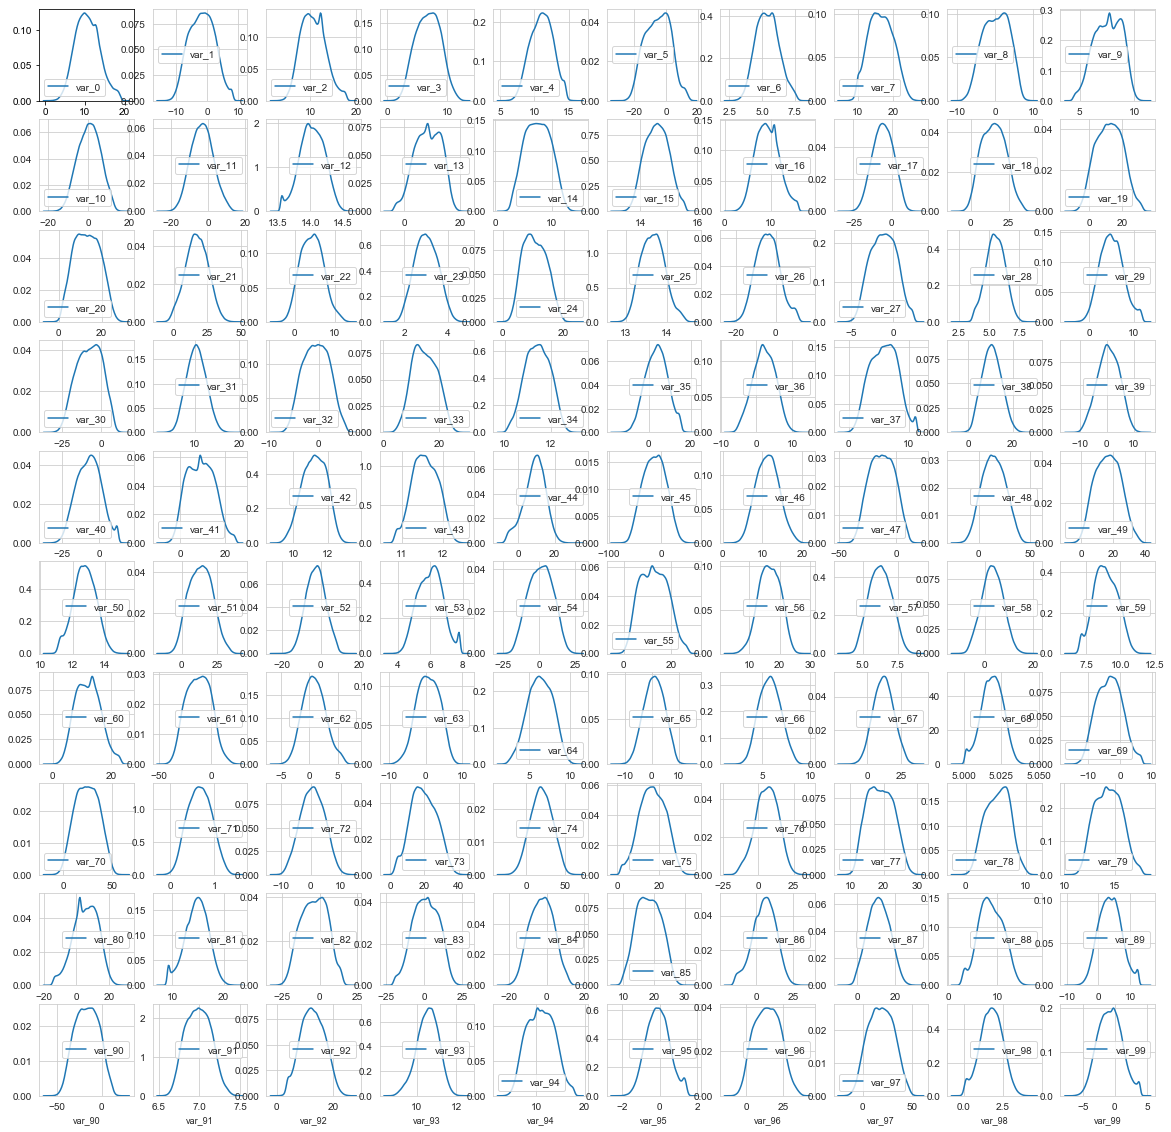

CPU times: user 37.3 s, sys: 156 ms, total: 37.5 s
Wall time: 37.5 s


In [57]:
%%time
Density_plots(train_data,train_data.columns[2:102])

<Figure size 432x288 with 0 Axes>

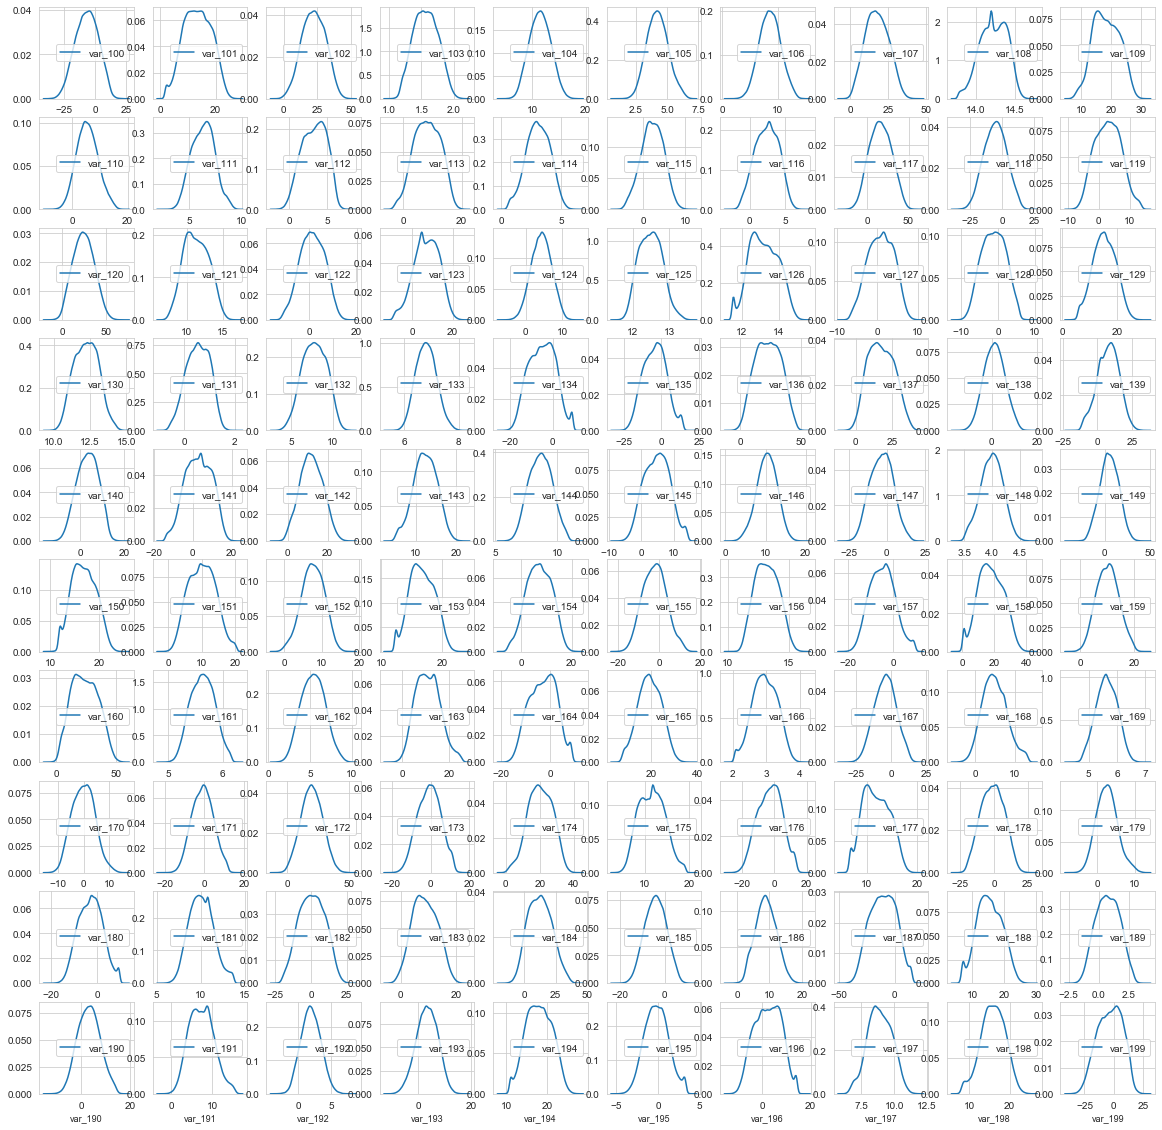

CPU times: user 37.1 s, sys: 114 ms, total: 37.2 s
Wall time: 37.2 s


In [60]:
%%time
# Plotting the next 100 Feature in the training dataset

Density_plots(train_data,train_data.columns[102:])

- Many of the Features are have the same distribution
- Some of the Features are following the Normal Distribution

#### 1.3 Plotting the distributions for each varible with respective of their target

In [72]:
def Density_plots_tar(df1,df2,feat):
    plt.figure()
    fig,ax=plt.subplots(10,10,figsize=(20,20))
    for i,f in enumerate(feat):
        plt.subplot(10,10,i+1)
        sbn.set_style('whitegrid')
        sbn.kdeplot(df1[f])
        sbn.kdeplot(df2[f])
        plt.legend(["class_0","class_1"])
        plt.xlabel(f,fontsize=9)
    plt.show()

<Figure size 432x288 with 0 Axes>

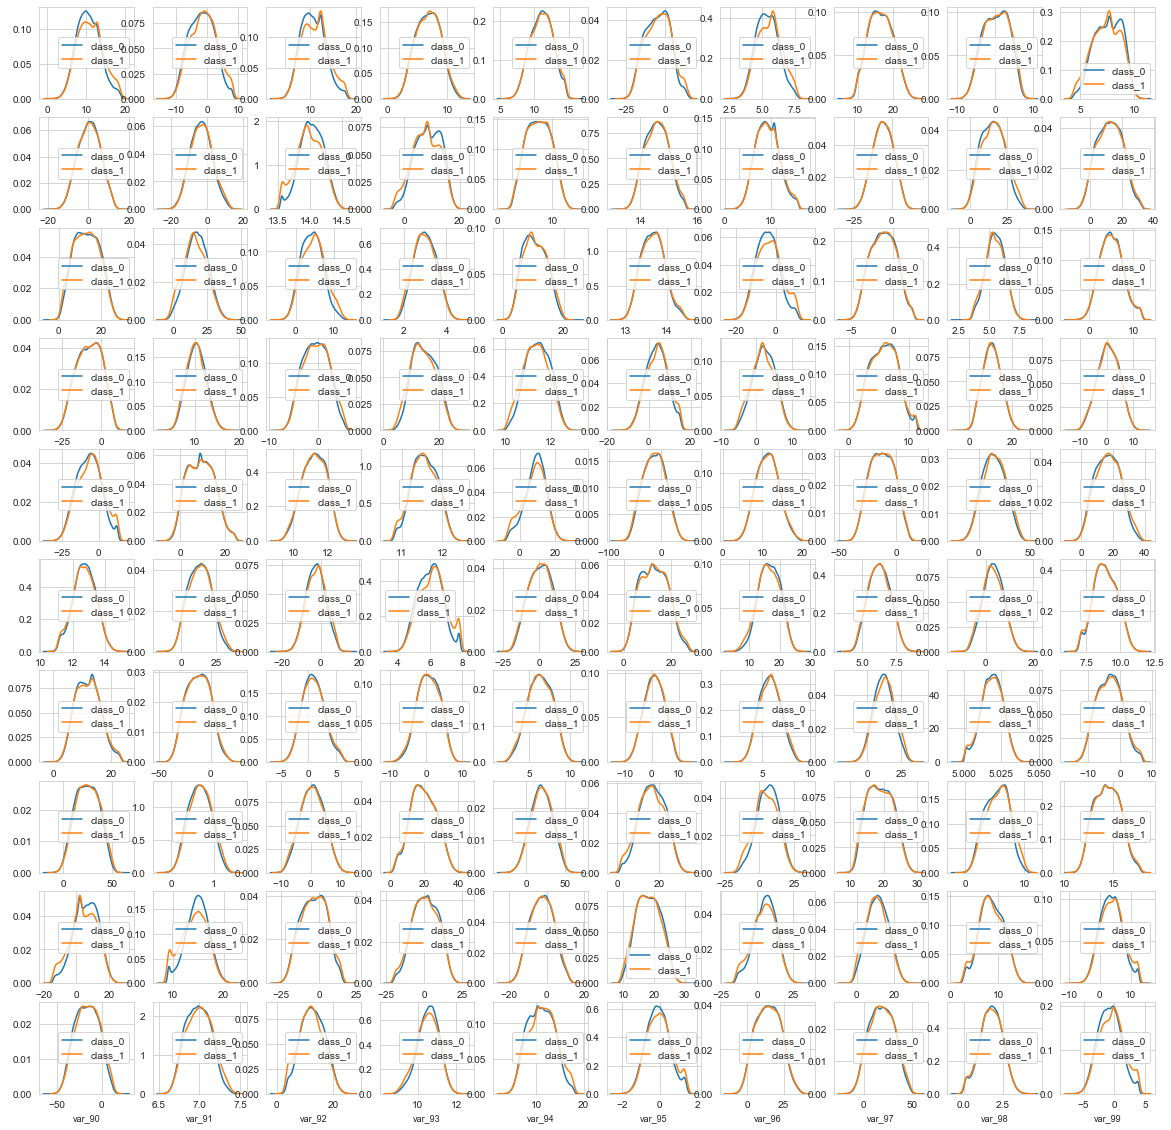

CPU times: user 39.4 s, sys: 187 ms, total: 39.6 s
Wall time: 39.5 s


In [73]:
%%time
Density_plots_tar(train_data.loc[train_data.target==0],train_data.loc[train_data.target==1],train_data.columns[2:102])

<Figure size 432x288 with 0 Axes>

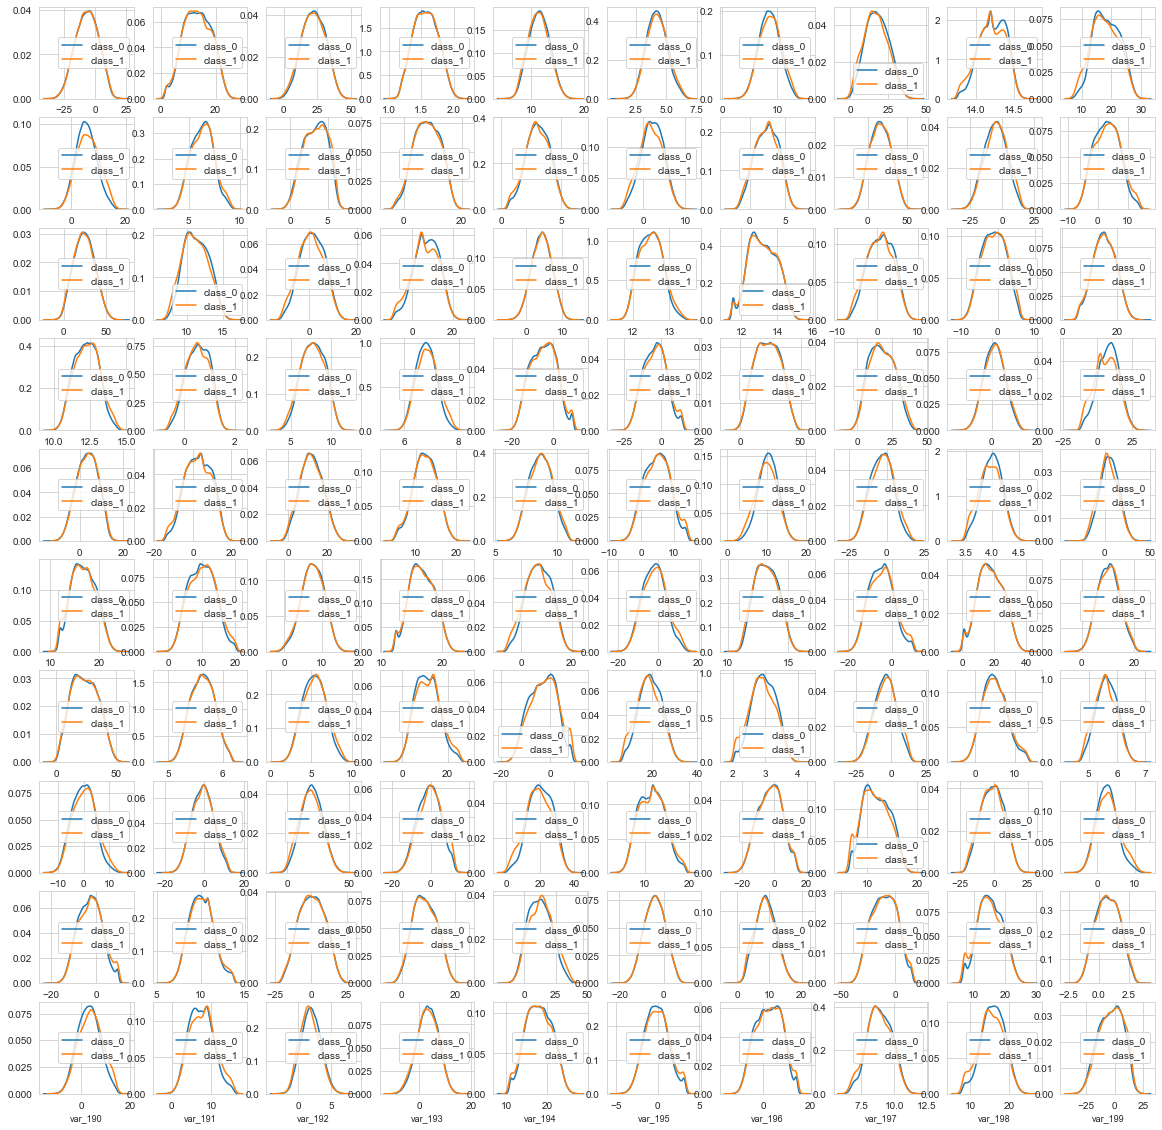

CPU times: user 40.7 s, sys: 237 ms, total: 40.9 s
Wall time: 41 s


In [74]:
%%time
Density_plots_tar(train_data.loc[train_data.target==0],train_data.loc[train_data.target==1],train_data.columns[102:])

- Some of the Features like var_0,1,2,9 etc.. have diffirent distributions for the different target variables.
- Some Features have the same distribution of both classes

#### 1.4 Descriptive Analysis

In [76]:
%%time
train_data.describe()

CPU times: user 2.4 s, sys: 31.8 ms, total: 2.44 s
Wall time: 2.44 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [77]:
descript_data=train_data.describe().T

In [90]:
class_0_des=train_data.loc[train_data.target==0].describe().T
class_1_des=train_data.loc[train_data.target==1].describe().T

***1.4.1 plotting the means of all the variables(Column_wise)***

Text(0.5, 1.0, 'Mean of all the Features')

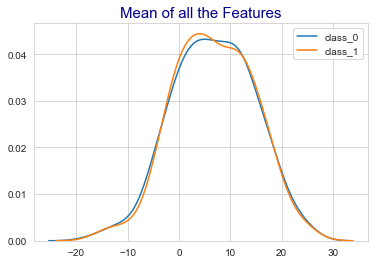

In [92]:
sbn.kdeplot(class_0_des["mean"])
sbn.kdeplot(class_1_des["mean"])
plt.legend(["class_0","class_1"])
plt.title("Mean of all the Features",fontsize=15,color="darkblue")

***1.4.2 plotting the standard deviation of all Features(column wise)***

Text(0.5, 1.0, 'Standard Deviation of all Features')

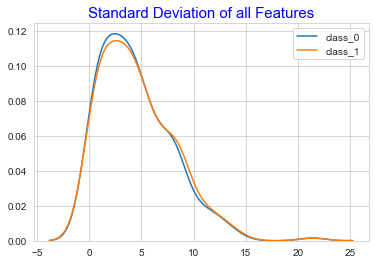

In [93]:
sbn.kdeplot(class_0_des["std"])
sbn.kdeplot(class_1_des["std"])
plt.legend(["class_0","class_1"])
plt.title("Standard Deviation of all Features",fontsize=15,color="blue")

***1.4.3 Plotting the Max values of all Features(Column wise)***

Text(0.5, 1.0, 'Max of the all Features')

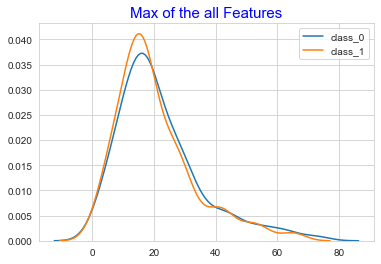

In [94]:
sbn.kdeplot(class_0_des["max"])
sbn.kdeplot(class_1_des["max"])
plt.legend(["class_0","class_1"])
plt.title("Max of the all Features",fontsize=15,color="blue")

****1.4.4 Plotting the minimum values of all the Features(column_wise)****

Text(0.5, 1.0, 'Distribution of all Minimum values of all the Features')

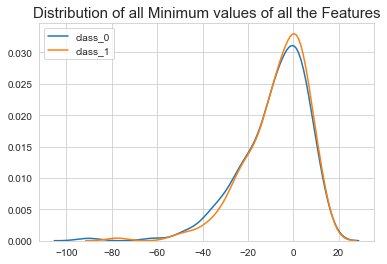

In [95]:
sbn.kdeplot(class_0_des["min"])
sbn.kdeplot(class_1_des["min"])
plt.legend(["class_0","class_1"])
plt.title("Distribution of all Minimum values of all the Features",fontsize=15)

***Observations:***
- Some of the Features have very low minimum values
- the Distributions of mean,max ,std have some similarity for the both classes

***1.4.5 Skewness of the data of Each Feature(Column wise)***

In [100]:
class_0_skew=train_data.loc[train_data.target==0].skew()
class_1_skew=train_data.loc[train_data.target==1].skew()

Text(0.5, 1.0, 'Distribution of Skew values')

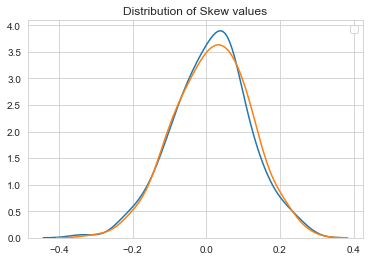

In [101]:
# The distribution of the skewed data.
sbn.kdeplot(class_0_skew.values)
sbn.kdeplot(class_1_skew.values)
plt.legend(["class_0","class_1"])
plt.title("Distribution of Skew values")

- There are some Features which are have some skewness but not so high, large number of Features are following the Normal distribution

#### 1.5 Feature Correlation

In [108]:
%%time
# correlation between the Features
correlation=train_data.corr().abs().unstack().sort_values(kind="quicksort").reset_index()

CPU times: user 23.9 s, sys: 62.4 ms, total: 24 s
Wall time: 24 s


In [109]:
correlation_=correlation[correlation.level_0!=correlation.level_1]

In [121]:
correlation_=correlation_.loc[(correlation_.index)%2==0]

In [122]:
# printing the top 10 highly correlated variables
correlation_.tail(10)

,level_0,level_1,0
40180,target,var_174,0.061669
40182,var_76,target,0.061917
40184,target,var_26,0.062422
40186,var_53,target,0.063399
40188,var_146,target,0.063644
40190,var_110,target,0.064275
40192,var_6,target,0.066731
40194,var_12,target,0.069489
40196,target,var_139,0.074080
40198,target,var_81,0.080917


In [126]:
#printing the top 10 have low correlated variables

correlation_.head(10)

,level_0,level_1,0
0,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
4,var_126,var_109,1.313947e-07
6,var_144,var_27,1.772502e-07
8,var_177,var_100,3.116544e-07
10,var_12,var_181,4.033775e-07
12,var_116,var_150,6.628008e-07
14,var_142,var_44,7.934263e-07
16,var_13,var_171,1.181142e-06
18,var_69,var_126,1.218374e-06


***Note:*** Here It doesn't have the highly correlated variables

### Feature Engineering

In [4]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
%%time

# Deriving the New Features for the training dataset
mean_r=train_data.iloc[:,2:].mean(axis=1).values
min_r=train_data.iloc[:,2:].min(axis=1).values
max_r=train_data.iloc[:,2:].max(axis=1).values
std_r=train_data.iloc[:,2:].std(axis=1).values
skew_r=train_data.iloc[:,2:].skew(axis=1).values
kurto_r=train_data.iloc[:,2:].kurtosis(axis=1).values
median_r=train_data.iloc[:,2:].median(axis=1).values

CPU times: user 3.22 s, sys: 553 ms, total: 3.77 s
Wall time: 3.82 s


In [10]:
## Adding the new features to the training dataset
train_data["mean_r"]=mean_r
train_data["min_r"]=min_r
train_data["max_r"]=max_r
train_data["std_r"]=std_r
train_data["skew_r"]=skew_r
train_data["kurto_r"]=kurto_r
train_data["median_r"]=median_r

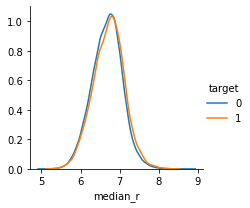

In [12]:
#density plot for the median row_wise
sbn.FacetGrid(data=train_data,hue="target").map(sbn.kdeplot,"median_r").add_legend()

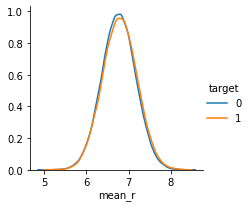

In [9]:
# Density plot for the Mean row wise
sbn.FacetGrid(data=train_data,hue="target").map(sbn.kdeplot,"mean_r").add_legend()

CPU times: user 2.69 s, sys: 993 ms, total: 3.68 s
Wall time: 3.48 s


Text(0.5, 1, 'The Row wise min value')

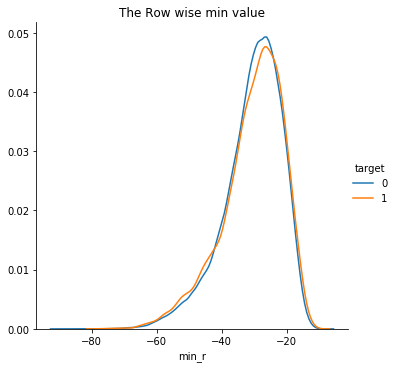

In [10]:
%%time
# Density plot for the Min row wise
sbn.FacetGrid(data=train_data,hue="target",height=5).map(sbn.kdeplot,"min_r").add_legend()
plt.title("The Row wise min value")

CPU times: user 2.67 s, sys: 1.16 s, total: 3.83 s
Wall time: 3.56 s


Text(0.5, 1, 'The Row wise max value')

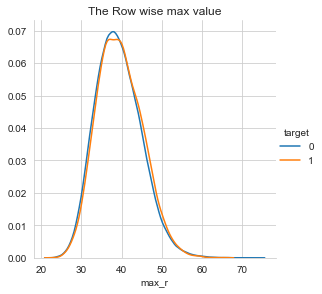

In [151]:
%%time
# Density plot for the Max row wise
sbn.FacetGrid(data=train_data,hue="target",height=4).map(sbn.kdeplot,"max_r").add_legend()
plt.title("The Row wise max value")

CPU times: user 2.71 s, sys: 1.12 s, total: 3.84 s
Wall time: 3.57 s


Text(0.5, 1, 'The Row wise standard deviation value')

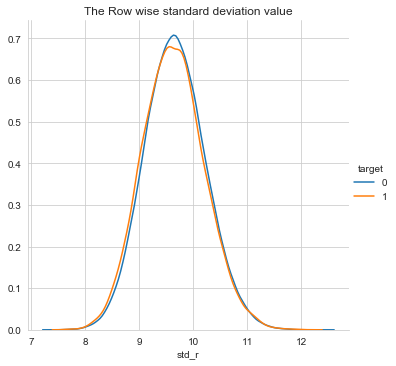

In [152]:
%%time
# Density plot for the std row wise
sbn.FacetGrid(data=train_data,hue="target",height=5).map(sbn.kdeplot,"std_r").add_legend()
plt.title("The Row wise standard deviation value")

CPU times: user 2.64 s, sys: 1.18 s, total: 3.82 s
Wall time: 3.55 s


Text(0.5, 1, 'The Row wise skewed value')

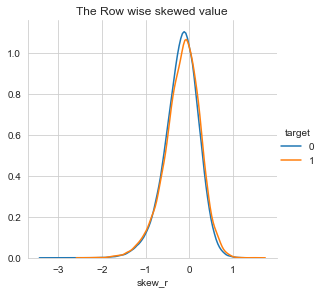

In [153]:
%%time
# Density plot for the skew row wise
sbn.FacetGrid(data=train_data,hue="target",height=4).map(sbn.kdeplot,"skew_r").add_legend()
plt.title("The Row wise skewed value")

CPU times: user 2.78 s, sys: 1.12 s, total: 3.9 s
Wall time: 3.68 s


Text(0.5, 1, 'The Row wise kurtosis value')

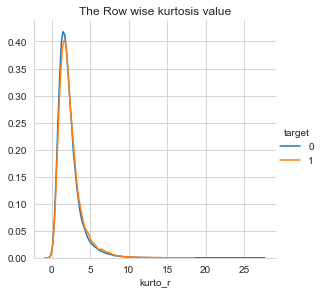

In [154]:
%%time
# Density plot for the kurtosis row wise
sbn.FacetGrid(data=train_data,hue="target",height=4).map(sbn.kdeplot,"kurto_r").add_legend()
plt.title("The Row wise kurtosis value")

### 2. Preprocessing

- No Missing values
- There is no correlated variables.


#### 2.1 Splitting the Training set and validataion set

In [11]:
x=train_data.iloc[:,2:]
y=train_data.target

In [12]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,stratify=y)

In [13]:
# printing the shapes of the training sets and validation sets
print("The shape of the training set :",x_train.shape,y_train.shape)
print("The shape of the validation set :",x_val.shape,y_val.shape)

The shape of the training set : (140000, 207) (140000,)
The shape of the validation set : (60000, 207) (60000,)


#### 2.2 Stardization of the data 

In [14]:
# stardizing the data 
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [15]:
# Trqansforming the datasets
x_train_norm=sc.transform(x_train)
x_val_norm=sc.transform(x_val)

#### 2.3 Dealing with the Imbalanced Dataset

***2.3.1 Upsampling***
- Here we will do the upsampling for minority class 

In [16]:
x=pd.concat([x_train,y_train],axis=1)

In [17]:
target_0=x.loc[x["target"]==0]
target_1=x.loc[x["target"]==1]

In [18]:
target_1_upsample=resample(target_1,replace=True,n_samples=len(target_0),\
                           random_state=27)

In [19]:
upsampled=pd.concat([target_0,target_1_upsample])

In [20]:
# checking for the balancing the data
upsampled.target.value_counts()

1    125931
0    125931
Name: target, dtype: int64

***Now the data was upsampled the miniority class***

***2.3.2 DownSampling***

In [21]:
target_0_downsample=resample(target_0,replace=False,n_samples=len(target_1),)

In [22]:
downsamples=pd.concat([target_0_downsample,target_1])

In [23]:
# printing the number of class0 and class1
downsamples.target.value_counts()

1    14069
0    14069
Name: target, dtype: int64

### 3. Building the Machine Learning Models

In [50]:
def roc_plot(fpr,tpr,fpr_val,tpr_val):
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr)
    plt.plot(fpr_val,tpr_val)
    plt.plot([0+0.01,1-0.01],[0+0.01,1-0.01],linestyle='dashed')
    plt.legend(["train set","validation"])
    plt.xlabel("False positive rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC_AUC_CURVE")
    plt.show()
    

def Prediction(model):
    y_pre_prob_train=model.predict_proba(x_train)
    y_pre_prob_val=model.predict_proba(x_val)
    y_pre_train=model.predict(x_train)
    y_pre_val=model.predict(x_val)
    print("----------------Roc_Auc_score------------")
    print("Train_data :",roc_auc_score(y_train,y_pre_prob_train[:,1]))
    print("Validation :",roc_auc_score(y_val,y_pre_prob_val[:,1]))
    print("="*50)
    print("---------F1-Score--------------------")
    print("Train_data :",f1_score(y_train,y_pre_train))
    print("Validation :",f1_score(y_val,y_pre_val))
    
    print("-------Recall Score--------------------")
    print("Train_data :",recall_score(y_train,y_pre_train))
    print("Validation :",recall_score(y_val,y_pre_val))
    
    print("-------Precision Score--------------------")
    print("Train_data :",precision_score(y_train,y_pre_train))
    print("Validation :",precision_score(y_val,y_pre_val))
    
    print("-------Accuracy Score--------------------")
    print("Train_data :",accuracy_score(y_train,y_pre_train))
    print("Validation :",accuracy_score(y_val,y_pre_val))
    
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_pre_prob_train[:,1])
    fpr_val,tpr_val, thresh=roc_curve(y_val,y_pre_prob_val[:,1])
    roc_plot(fpr_tr,tpr_tr,fpr_val,tpr_val)
    
def Prediction_norm(model):
    y_pre_prob_train=model.predict_proba(x_train_norm)
    y_pre_prob_val=model.predict_proba(x_val_norm)
    y_pre_train=model.predict(x_train_norm)
    y_pre_val=model.predict(x_val_norm)
    print("----------------Roc_Auc_score------------")
    print("Train_data :",roc_auc_score(y_train,y_pre_prob_train[:,1]))
    print("Validation :",roc_auc_score(y_val,y_pre_prob_val[:,1]))
    print("="*50)
    print("---------F1-Score--------------------")
    print("Train_data :",f1_score(y_train,y_pre_train))
    print("Validation :",f1_score(y_val,y_pre_val))
    
    print("-------Recall Score--------------------")
    print("Train_data :",recall_score(y_train,y_pre_train))
    print("Validation :",recall_score(y_val,y_pre_val))
    
    print("-------Precision Score--------------------")
    print("Train_data :",precision_score(y_train,y_pre_train))
    print("Validation :",precision_score(y_val,y_pre_val))
    
    print("-------Accuracy Score--------------------")
    print("Train_data :",accuracy_score(y_train,y_pre_train))
    print("Validation :",accuracy_score(y_val,y_pre_val))
    
    
    
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_pre_prob_train[:,1])
    fpr_val,tpr_val, thresh=roc_curve(y_val,y_pre_prob_val[:,1])
    roc_plot(fpr_tr,tpr_tr,fpr_val,tpr_val)
    

#### 3.1 Logistic Regression

In [25]:
model=LogisticRegression(max_iter=500,C=30)

In [26]:
%%time
model.fit(x_train_norm,y_train)

CPU times: user 8.12 s, sys: 1.89 s, total: 10 s
Wall time: 2.81 s


LogisticRegression(C=30, max_iter=500)

----------------Roc_Auc_score------------
Train_data : 0.8687134650154014
Validation : 0.8670176561250701
---------F1-Score--------------------
Train_data : 0.4110687788249449
Validation : 0.4095682613768961
-------Recall Score--------------------
Train_data : 0.29142085436065107
Validation : 0.2910930502570907
-------Precision Score--------------------
Train_data : 0.6973975165844531
Validation : 0.6906729634002361
-------Accuracy Score--------------------
Train_data : 0.9160857142857143
Validation : 0.9156666666666666


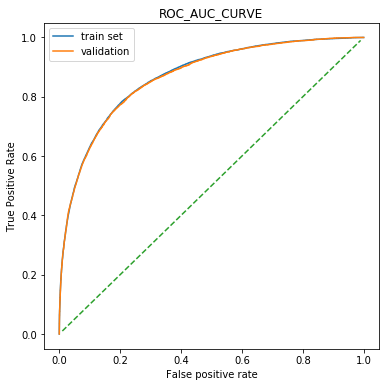

CPU times: user 1.26 s, sys: 316 ms, total: 1.58 s
Wall time: 926 ms


In [51]:
%%time
Prediction_norm(model)

- By using the Logistic Regrssion got good roc score 
- But got low F1-score and Recall --> This is due to having dataset is imbalanced

***3.1.1 Build Logistic Regression model for balanced dataset***

----------------Roc_Auc_score------------
Train_data : 0.8681629817466091
Validation : 0.8657480549433121
---------F1-Score--------------------
Train_data : 0.4276117674310864
Validation : 0.42692237774950004
-------Recall Score--------------------
Train_data : 0.7872627763167247
Validation : 0.7790678387792337
-------Precision Score--------------------
Train_data : 0.2935206042135948
Validation : 0.29402190923317684
-------Accuracy Score--------------------
Train_data : 0.7882
Validation : 0.7898333333333334


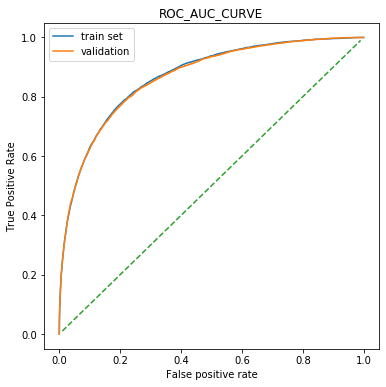

CPU times: user 3.05 s, sys: 751 ms, total: 3.8 s
Wall time: 1.53 s


In [30]:
%%time
# Building the Model for the balanced dataset > here we use downsampledata
model_lr_1=LogisticRegression(C=5,max_iter=500)
model_lr_1.fit(sc.transform(downsamples.iloc[:,:-1]),downsamples.iloc[:,-1])
Prediction_norm(model_lr_1)

- By using the Downsample data roc_score and F1-Score are remains same 
- Here Recall score is increased

----------------Roc_Auc_score------------
Train_data : 0.868888953485133
Validation : 0.8667263206127859
---------F1-Score--------------------
Train_data : 0.42986178703523453
Validation : 0.4304550865305375
-------Recall Score--------------------
Train_data : 0.784775037316085
Validation : 0.7797312987228396
-------Precision Score--------------------
Train_data : 0.2959974263424573
Validation : 0.2972870423069626
-------Accuracy Score--------------------
Train_data : 0.7908
Validation : 0.7926666666666666


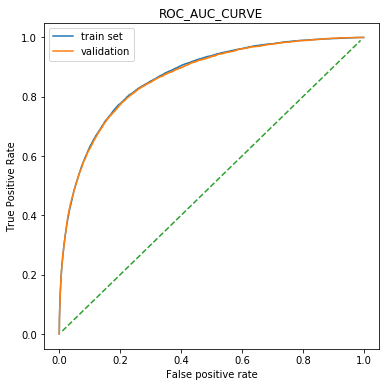

CPU times: user 17.7 s, sys: 3.6 s, total: 21.3 s
Wall time: 6.44 s


In [31]:
%%time
# Building the Model for the balanced dataset > here we use upsampled data
model_lr_1=LogisticRegression(C=3,max_iter=500)
model_lr_1.fit(sc.transform(upsampled.iloc[:,:-1]),upsampled.iloc[:,-1])
Prediction_norm(model_lr_1)

- Score are Remaining same for both the downsampled data and upsampled data

#### 3.2 Guassian Naive Bayes

***3.2.1 Imbalanced data***

In [32]:
model_nb=GaussianNB(var_smoothing=0.000000000061)

In [33]:
model_nb.fit(x_train_norm,y_train)

GaussianNB(var_smoothing=6.1e-11)

----------------Roc_Auc_score------------
Train_data : 0.8852505473062771
Validation : 0.8862325082409507
---------F1-Score--------------------
Train_data : 0.47908361970217633
Validation : 0.4814417506972753
-------Recall Score--------------------
Train_data : 0.3715971284384107
Validation : 0.3722010283629126
-------Precision Score--------------------
Train_data : 0.6740587931923672
Validation : 0.6814454904342545
-------Accuracy Score--------------------
Train_data : 0.9187928571428572
Validation : 0.9194333333333333


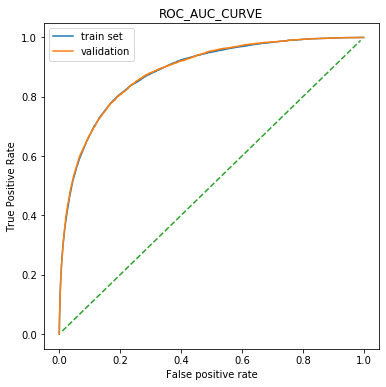

In [34]:
Prediction_norm(model_nb)

- Here F1 score ,Roc_Auc score were increased compare to the Logistic Regression model.
- But the Recall score is low here
- This is may be due to the Imbalance

***3.2.2 Balanced Data (Downsampling data)***

In [35]:
model_nb.get_params()

{'priors': None, 'var_smoothing': 6.1e-11}

----------------Roc_Auc_score------------
Train_data : 0.8839257721109566
Validation : 0.8850981473654604
---------F1-Score--------------------
Train_data : 0.45303091128061024
Validation : 0.45517829237107543
-------Recall Score--------------------
Train_data : 0.8021181320634018
Validation : 0.7971471222424946
-------Precision Score--------------------
Train_data : 0.3156555061396884
Validation : 0.3185312831389183
-------Accuracy Score--------------------
Train_data : 0.8053571428571429
Validation : 0.80825


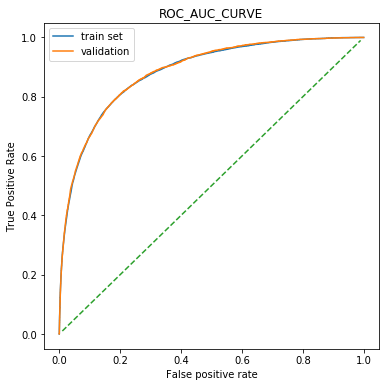

In [36]:
model_nb_1=GaussianNB(var_smoothing=0.0000000000009)
model_nb_1.fit(sc.transform(downsamples.iloc[:,:-1]),downsamples.iloc[:,-1])
Prediction_norm(model_nb_1)

- Here Recall score is increased highly compared to the model built with the imbalanced dataset.
- Some what F1-score also increased

----------------Roc_Auc_score------------
Train_data : 0.8843084859485777
Validation : 0.8854740672287287
---------F1-Score--------------------
Train_data : 0.45705571370475795
Validation : 0.458133742096187
-------Recall Score--------------------
Train_data : 0.7988485322339897
Validation : 0.7931663625808592
-------Precision Score--------------------
Train_data : 0.32009911423770326
Validation : 0.32208526975146495
-------Accuracy Score--------------------
Train_data : 0.8092714285714285
Validation : 0.8114666666666667


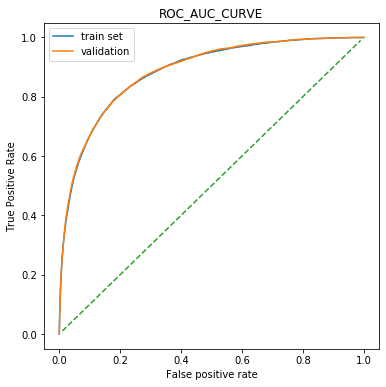

In [37]:
## building model for the upsampling data
model_nb_2=GaussianNB(var_smoothing=0.00000000007)
model_nb_2.fit(upsampled.iloc[:,:-1],upsampled.iloc[:,-1])
Prediction(model_nb_2)

- It doesn't have Much difference compare to the above technique
- Remains same score compared to the above balanced dataset

#### 3.3 Decision Trees

----------------Roc_Auc_score------------
Train_data : 0.7020721228458188
Validation : 0.6485127135860506
---------F1-Score--------------------
Train_data : 0.24374999999999997
Validation : 0.10053291084545585
-------Recall Score--------------------
Train_data : 0.14137465349349634
Validation : 0.05788688007961519
-------Precision Score--------------------
Train_data : 0.8836072856508218
Validation : 0.38183807439824946
-------Accuracy Score--------------------
Train_data : 0.9118428571428572
Validation : 0.8959166666666667


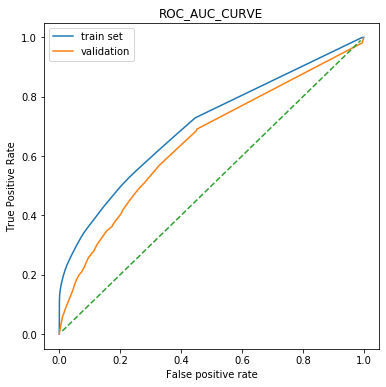

In [38]:
model_rf=DecisionTreeClassifier(max_depth=10)
model_rf.fit(x_train,y_train)
Prediction(model_rf)

- By using the decsision trees seems to be not good at all because it giving the low accuracy .
- And also it was very time consuming method

----------------Roc_Auc_score------------
Train_data : 0.7550574232209414
Validation : 0.6147005226408133
---------F1-Score--------------------
Train_data : 0.33778991417831056
Validation : 0.2479456054728236
-------Recall Score--------------------
Train_data : 0.6770203994598053
Validation : 0.49295073809918727
-------Precision Score--------------------
Train_data : 0.22503366645403644
Validation : 0.16562639322336156
-------Accuracy Score--------------------
Train_data : 0.7332428571428572
Validation : 0.6995166666666667


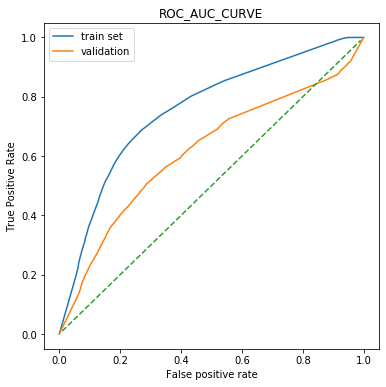

In [39]:
# Building the model for the downsampled data
model_df_1=DecisionTreeClassifier(max_depth=12)
model_df_1.fit(downsamples.iloc[:,:-1],downsamples.iloc[:,-1])
Prediction(model_df_1)

- Recall and F1-score was increased compared to the previous method

#### 3.4 Random Forest

----------------Roc_Auc_score------------
Train_data : 0.8972978803942866
Validation : 0.7628833594092825
---------F1-Score--------------------
Train_data : 0.04732824427480916
Validation : 0.0019884009942004975
-------Recall Score--------------------
Train_data : 0.024237685691946835
Validation : 0.0009951899154088573
-------Precision Score--------------------
Train_data : 1.0
Validation : 1.0
-------Accuracy Score--------------------
Train_data : 0.9019428571428572
Validation : 0.8996166666666666


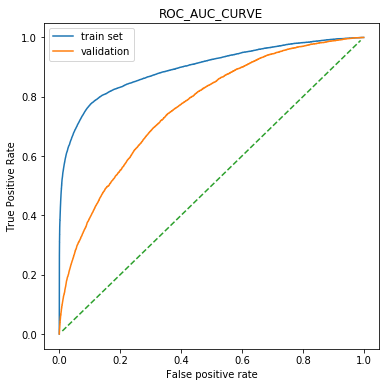

In [40]:
model_rf=RandomForestClassifier(max_depth=12,n_estimators=15)
model_rf.fit(x_train,y_train)
Prediction(model_rf)

----------------Roc_Auc_score------------
Train_data : 0.8806351636391219
Validation : 0.7434113736937764
---------F1-Score--------------------
Train_data : 0.4017642206622561
Validation : 0.3064856005619293
-------Recall Score--------------------
Train_data : 0.8481768427038169
Validation : 0.651351799635097
-------Precision Score--------------------
Train_data : 0.26322407023426125
Validation : 0.20038781446139714
-------Accuracy Score--------------------
Train_data : 0.7461642857142857
Validation : 0.7038


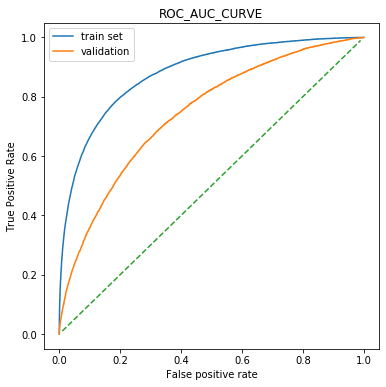

In [41]:
model_rf_1=RandomForestClassifier(max_depth=12,n_estimators=13)
model_rf_1.fit(downsamples.iloc[:,:-1],downsamples.iloc[:,-1])
Prediction(model_rf_1)

- The accuracy was not so bad but here Recall score is increased

----------------Roc_Auc_score------------
Train_data : 0.8957517500847094
Validation : 0.7620880089738393
---------F1-Score--------------------
Train_data : 0.5233205068503223
Validation : 0.3524497629261685
-------Recall Score--------------------
Train_data : 0.758831473452271
Validation : 0.5178304859844087
-------Precision Score--------------------
Train_data : 0.3993715397276672
Validation : 0.2671344228630102
-------Accuracy Score--------------------
Train_data : 0.8610785714285715
Validation : 0.8088


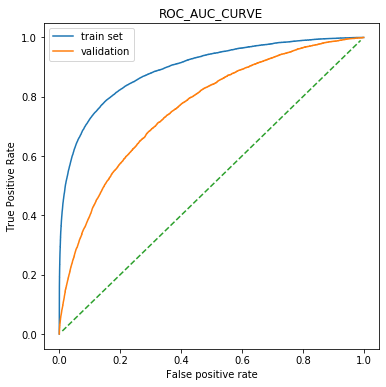

In [42]:
model_rf_2=RandomForestClassifier(max_depth=10,n_estimators=20)
model_rf_2.fit(sc.transform(upsampled.iloc[:,:-1]),upsampled.iloc[:,-1])
Prediction_norm(model_rf_2)

- Not much increased the accuracy compared to the above methods

#### 3.5 XGboost

----------------Roc_Auc_score------------
Train_data : 0.9606888327889681
Validation : 0.8659762495268043
---------F1-Score--------------------
Train_data : 0.6306915602971995
Validation : 0.35472549511155677
-------Recall Score--------------------
Train_data : 0.47060914066387094
Validation : 0.23469895505058883
-------Precision Score--------------------
Train_data : 0.9558250324815938
Validation : 0.7260133401744484
-------Accuracy Score--------------------
Train_data : 0.9446142857142857
Validation : 0.9142


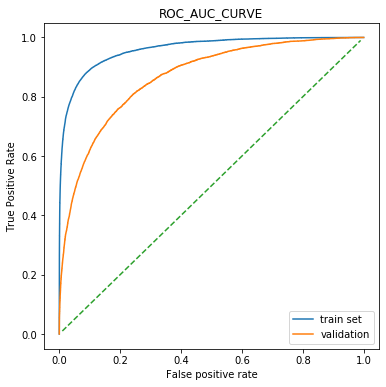

In [43]:
model_xg=XGBClassifier(max_depth=5)
model_xg.fit(x_train,y_train)
Prediction(model_xg)

- Compared to the above methods F1 score and recall score is very low

----------------Roc_Auc_score------------
Train_data : 0.9320178618484554
Validation : 0.8695469749994037
---------F1-Score--------------------
Train_data : 0.5254237288135593
Validation : 0.448670346211741
-------Recall Score--------------------
Train_data : 0.8703532589380908
Validation : 0.7415823519655
-------Precision Score--------------------
Train_data : 0.37629452075842784
Validation : 0.32163153729947486
-------Accuracy Score--------------------
Train_data : 0.842
Validation : 0.8168666666666666


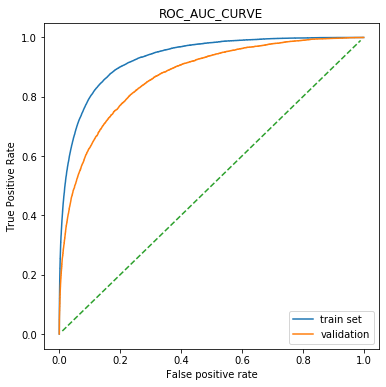

In [44]:
model_lgbm=lgbm.LGBMClassifier()
model_lgbm.fit(upsampled.iloc[:,:-1],upsampled.iloc[:,-1])
Prediction(model_lgbm)

### Summary of all results

In [53]:
import tabletext

In [54]:
data=[["Model","train ROC_AUC SCore","validation ROC_AUC SCORE"],
      ["Logistic Regression","0.86","0.86"],
      ["GaussianNB","0.884","0.885"],
      ["Decision Trees","0.75","0.61"],
      ["Random Forest","0.89","0.76"],
      ["XGboost","0.96","0.86"],
      ["LightGBM","0.93","0.86"]]

In [56]:
print(tabletext.to_text(data))

┌─────────────────────┬─────────────────────┬──────────────────────────┐
│ Model               │ train ROC_AUC SCore │ validation ROC_AUC SCORE │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ Logistic Regression │ 0.86                │ 0.86                     │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ GaussianNB          │ 0.884               │ 0.885                    │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ Decision Trees      │ 0.75                │ 0.61                     │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ Random Forest       │ 0.89                │ 0.76                     │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ XGboost             │ 0.96                │ 0.86                     │
├─────────────────────┼─────────────────────┼──────────────────────────┤
│ LightGBM            │ 0.93                │ 0.86 

- BY this Table We can choose Naive Bayes as Model for generalization.
- But By taking naive bayes we cannot interpret the model and also it was difficult to get Feature importance because it is naive(i.e it assume Features are independent)

### 4. Creating the Submission File using the Testing data

In [39]:
test_data=pd.read_csv("test.csv")

In [40]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [34]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [41]:
mean_r1=test_data.iloc[:,1:].mean(axis=1).values
min_r1=test_data.iloc[:,1:].min(axis=1).values
max_r1=test_data.iloc[:,1:].max(axis=1).values
std_r1=test_data.iloc[:,1:].std(axis=1).values
skew_r1=test_data.iloc[:,1:].skew(axis=1).values
kurto_r1=test_data.iloc[:,1:].kurtosis(axis=1).values

median_r1=test_data.iloc[:,1:].median(axis=1).values

In [42]:
## Adding the new features to the training dataset
test_data["mean_r"]=mean_r1
test_data["min_r"]=min_r1
test_data["max_r"]=max_r1
test_data["std_r"]=std_r1
test_data["skew_r"]=skew_r1
test_data["kurto_r"]=kurto_r1

test_data["median_r"]=median_r1

In [37]:
#test_data=sc.transform(test_data.iloc[:,1:])

In [40]:
## predicting with the test data with the Gaussian naive bayes model
test_data.shape

(200000, 209)

In [56]:
y_test_pre=model_nb_2.predict_proba(test_data.iloc[:,1:])

In [57]:
y_test=model_nb_2.predict(test_data.iloc[:,1:])

In [58]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [59]:
sub_file=pd.read_csv("sample_submission.csv")

In [60]:
sub_file["target"]=y_test

In [62]:
sub_file.to_csv("submit_7.csv",index=False)

In [61]:
sub_file.target.value_counts()

0    150593
1     49407
Name: target, dtype: int64